## 第十二讲：图和网络

本节课着重于线性代数的应用，应用数学中最重要的模型：离散数学称之为"图"

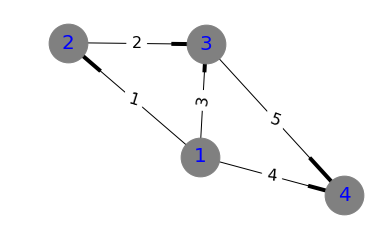

In [17]:
#先画一个图：
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
dg = nx.DiGraph()
dg.add_edges_from([(1,2),(2,3),(1,3),(1,4),(3,4)])
edge_labels = {(1,2):1,(1,3):3,(1,4):4,(2,3):2,(3,4):5}
pos = nx.spring_layout(dg)
nx.draw_networkx_edge_labels(dg,pos,edge_labels=edge_labels,font_size=16)
nx.draw_networkx_labels(dg,pos,font_size=20,font_color='b')
nx.draw(dg,pos,node_size=1500,node_color="gray")

该图由4个节点与5条边组成，$-1->1$表示一条边从一个节点到另一个节点
例如边1是从节点1到节点2，所以对应值为-1,1
$$
\begin{array}{c | c c c c}
       & node_1 & node_2 & node_3 & node_4 \\
\hline
edge_1 & -1     & 1      & 0      & 0      \\
edge_2 & 0      & -1     & 1      & 0      \\
edge_3 & -1     & 0      & 1      & 0      \\
edge_4 & -1     & 0      & 0      & 1      \\
edge_5 & 0      & 0      & -1     & 1      \\
\end{array}
$$


我们可以建立$5 \times 4$矩阵
$
A=
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1 \\
\end{bmatrix}
$

我们可以发现边一边二边三构成一个子图，在矩阵$A$表现为row1+row2=row3,三个行向量线性相关，也就是这三个向量可以形成回路（loop）,回路对应的是线性相关;

第一个问题，矩阵的零空间是什么？当提及矩阵的零空间，我们希望了解的是矩阵中的各列的线性关系（线性相关or线性无关）
如果各列线性无关，那么零空间包含哪些向量？--只包含零向量。
零空间告诉我们，如何对列向量进行线性组合其结果可以得到零向量；那么我们来求解$Ax=0$来找零空间

解$Ax=0$：

$
Ax=
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4\\
\end{bmatrix}
$

展开得到：
$\begin{bmatrix}
x_2-x_1\\
x_3-x_2\\
x_3-x_1\\
x_4-x_1\\
x_4-x_3\\
\end{bmatrix}=\begin{bmatrix}
0\\
0\\
0\\
0\\
0\\
\end{bmatrix}$

将$x=\begin{bmatrix}x_1 & x_2 & x_3 & x_4\end{bmatrix}$设为各节点电势（Potential at the Nodes）。

结合矩阵的实际意义，通过矩阵可以算出各边上的差值

式子中的诸如$x_2-x_1$的元素，可以看做该边上的电势差（Potential Differences）。

电势差什么时候为零呢？
回答这个问题就需要找出零空间

当然当$x$全为零当然能使电势差为零，这表明零向量理所当然地在零空间里，当时零向量里还有其他的向量；$A$的列向量是线性相关的，因为很容易看出方程组不止一个解；

举个例子，当各个节点等电势时，则电势差为零

其中一个解$x=\begin{bmatrix}1\\1\\1\\1\end{bmatrix}$，即等电势情况，此时电势差为$0$。

化简$A$易得$rank(A)=3$，所以其零空间维数应为$dimN(A)=n-r=4-3=1$，即$\begin{bmatrix}1\\1\\1\\1\end{bmatrix}$就是其零空间的一组基。

其零空间的物理意义为，当电位相等时，不存在电势差，图中无电流。
零空间的物理意义为，当电位相等时，不存在电势差，图中无电流。

当我们把图中节点$4$接地后，节点$4$上的电势为$0$，此时的
$
A=
\begin{bmatrix}
-1 & 1 & 0 \\
0 & -1 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 0 \\
0 & 0 & -1 \\
\end{bmatrix}
$，各列线性无关，$rank(A)=3$。

第二个问题，它的左零空间是什么？求解$A^Ty=0$


$A^Ty=0=\begin{bmatrix}-1 & 0 & -1 & -1 & 0 \\1 & -1 & 0 & 0 & 0 \\0 & 1 & 1 & 0 & -1 \\0 & 0 & 0 & 1 & 1 \\ \end{bmatrix}\begin{bmatrix}y_1\\y_2\\y_3\\y_4\\y_5\end{bmatrix}=\begin{bmatrix}0\\0\\0\\0\end{bmatrix}$

$dim N(A^T) = m -r = 5-3=2 $


接着说上文提到的的电势差，矩阵$C$将电势差与电流联系起来，电流与电势差的关系服从欧姆定律：边上的电流值是电势差的倍数，这个倍数就是边的电导（conductance）即电阻（resistance）的倒数。

$
电势差
\xrightarrow[欧姆定律]{矩阵C}
各边上的电流y_1, y_2, y_3, y_4, y_5
$，而$A^Ty=0$的另一个名字叫做“基尔霍夫电流定律”（Kirchoff's Law, 简称KCL）。

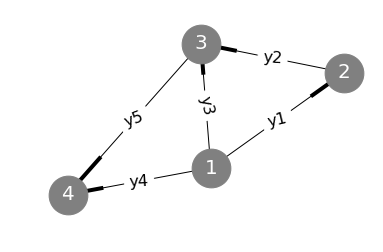

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

dg = nx.DiGraph()
dg.add_edges_from([(1,2), (2,3), (1,3), (1,4), (3,4)])
edge_labels = {(1, 2): 'y1', (1, 3): 'y3', (1, 4): 'y4', (2, 3): 'y2', (3, 4): 'y5'}

pos = nx.spring_layout(dg)
nx.draw_networkx_edge_labels(dg,pos,edge_labels=edge_labels, font_size=16)
nx.draw_networkx_labels(dg, pos, font_size=20, font_color='w')
nx.draw(dg, pos, node_size=1500, node_color="gray")

$
A=
\begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
-1 & 0 & 1 & 0 \\
-1 & 0 & 0 & 1 \\
0 & 0 & -1 & 1 \\
\end{bmatrix}
$



$A^Ty=0=\begin{bmatrix}-1 & 0 & -1 & -1 & 0 \\1 & -1 & 0 & 0 & 0 \\0 & 1 & 1 & 0 & -1 \\0 & 0 & 0 & 1 & 1 \\ \end{bmatrix}\begin{bmatrix}y_1\\y_2\\y_3\\y_4\\y_5\end{bmatrix}=\begin{bmatrix}0\\0\\0\\0\end{bmatrix}$

将$A^Ty=0$中的方程列出来：
$
\left\{
\begin{aligned}
y_1 + y_3 + y_4 &= 0 \\
y_1 - y_2 &= 0 \\
y_2 + y_3 - y_5 &= 0 \\
y_4 - y_5 &= 0 \\
\end{aligned}
\right.
$

我们可以从图中看出什么？

设$y_{1},y_{3},y_{4}$是从点$1$流出的电流，可以看出$y_{1}+y_{3}+y_{4}$这个方程式关于节点$1$上的电流的，说明合电流为0，方程
$A^Ty=0$即基尔霍夫电流定律，它是一个平衡方程、守恒定律，它说明了流入等于流出。电荷不会在节点上累积。

设$y_{1},y_{2}$是从点$2$流出的电流，可以看出$y_{1}-y_{2}$这个方程式关于节点$2$上的电流,它说明$y_{1}=y_{2}$，流入电流等于流出
...


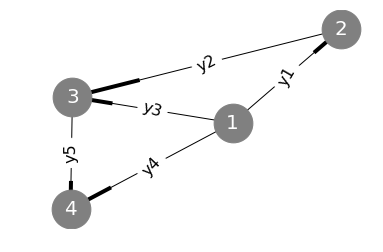

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

dg = nx.DiGraph()
dg.add_edges_from([(1,2), (2,3), (1,3), (1,4), (3,4)])
edge_labels = {(1, 2): 'y1', (1, 3): 'y3', (1, 4): 'y4', (2, 3): 'y2', (3, 4): 'y5'}

pos = nx.spring_layout(dg)
nx.draw_networkx_edge_labels(dg,pos,edge_labels=edge_labels, font_size=16)
nx.draw_networkx_labels(dg, pos, font_size=20, font_color='w')
nx.draw(dg, pos, node_size=1500, node_color="gray")

回到线性代数的问题上，这些方程的解--向量y是什么？即求解$A^T$的零空间，如果不用消元的话，通过节点图可以看出来：即电流是怎么在这个电路中流动，又不会积累电荷的。

$N(A^T)$ 的基需要多少个向量？$dim N(A^T) = m -r = 5-3=2 $

* 假设$y_{1}=1$，$1$安培电流从节点$1->2$的方向流动
* $y_{2}$也应该是$1$,$1$安培电流从节点$2->3$的方向流动
* 令$y_{3}=-1$，让$1$安培电流从节点$3->1$流过此回路
* 此时$y_{4},y_{5}$就没有电流，取$0$

得到一个符合KCL的向量$\begin{bmatrix}1\\1\\-1\\0\\0\end{bmatrix}$，代回方程组发现此向量即为一个解，这个解发生在节点$1,2,3$组成的回路中，该解即为零空间的一个基。

现在$1,3,4$组成的节点求另一个基：

* 令$y_1=y_2=0$；
* 令$y_3=1$；
* 由图得$y_5=1$；
* 令$y_4=-1$；

得到令一个符合KCL的向量$\begin{bmatrix}0\\0\\1\\-1\\1\end{bmatrix}$，代回方程可知此为另一个解。

则$N(A^T)$的一组基为$\begin{bmatrix}1\\1\\-1\\0\\0\end{bmatrix}\quad\begin{bmatrix}0\\0\\1\\-1\\1\end{bmatrix}$。

利用节点$1,2,3,4$组成的大回路（即边$1,2,5,4$）：

* 令$y_3=0$；
* 令$y_1=1$；
* 则由图得$y_2=1, y_5=1, y_4=-1$；

得到符合KCL的向量$\begin{bmatrix}1\\1\\0\\-1\\1\end{bmatrix}$，易看出此向量为求得的两个基之和。

我们还要考虑$A$的行空间，即$A^T$的列空间，方便起见我们直接计算
$
A^T=
\begin{bmatrix}
-1 & 0 & -1 & -1 & 0 \\
1 & -1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 & -1 \\ 
0 & 0 & 0 & 1 & 1 \\
\end{bmatrix}
$
的列空间。

从基的第一个向量看出前三列组成一个回路，同理在$A^T$的列空间中

$col_{1}+col_{2}=col_{3}$

即线性相关，则$A^T$的主列为第$1,2,4$列，对应图中就是边$1,2,4$，可以发现这三条边没有组成回路，在这里可以说"**线性无关等价于没有回路**"，由$4$个节点与三条边组成的图没有回路，就表明$A^T$的对应列向量线形无关，也就是节点数减一条边线性无关（$rank=node-1$）。另外，没有回路的图也叫做树。


再看左零空间的维数公式：

$rank=n-1=4-1$

$dim N(A^T)=m-r = 5-3=2$，$m$是边的数量，即$A^T$的列的数量，$r(rank)$是什么？从矩阵的列空间可以看出秩，秩是多少？因为n列表示的是n个节点，秩是节点的数量减1，因为前面讲零空间中只有（1,1,1,1），各列线性相关，不过由于零空间只有一维，所以秩是n-1

左零空间的维数就是相互无关的回路的数量，于是得到
$loops=edges-(nodes-1)$

$$
nodes-edges+loops=1
$$

此等式对任何图均有效，任何图都有此拓扑性质，这就是著名的欧拉公式（Euler's Formula）。$零维（节点）-一维（边）+二维（回路）=1$便于记忆。

总结：

* 将电势记为$e$，则在引入电势的第一步中，有$e=Ax$；
* 电势差导致电流产生，$y=Ce$；
* 电流满足基尔霍夫定律方程，$A^Ty=0$；

这些是在无电源情况下的方程。

电源可以通过：在边上加电池（电压源），或在节点上加外部电流 两种方式接入。

如果在边上加电池，会体现在$e=Ax$中；如果在节点上加电流，会体现在$A^Ty=f$中，$f$向量就是外部电流。

将以上三个等式连起来得到$A^TCAx=f$。另外，最后一个方程是一个平衡方程，还需要注意的是，方程仅描述平衡状态，方程并不考虑时间。最后，$A^TA$是一个对称矩阵。